In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import smogn
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
#Loading the dataset
df = pd.read_csv("train.csv")
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
#Knowing the Information about the dataset
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


# Filling NaN values

In [4]:
#Dropping the Unwanted features
df = df.drop(['Customer ID','Name'],axis=1)

In [5]:
#Filling NaN values
df["Gender"].fillna("unknown", inplace = True)

In [6]:
df["Gender"].isnull().values.any()

False

In [7]:
z = df["Age"].mode()
df["Age"].fillna(z, inplace = True)
df["Age"].isnull().values.any()

False

In [8]:
z = df["Income (USD)"].median()
df["Income (USD)"].fillna(z, inplace = True)

In [9]:
df["Income (USD)"].isnull().values.any()

False

In [10]:
df["Income Stability"].fillna("unknown", inplace = True)
df["Income Stability"].isnull().values.any()

False

In [11]:
z = df["Profession"].mode()
df["Profession"].fillna(z, inplace = True)
df["Profession"].isnull().values.any()

False

In [12]:
df["Type of Employment"].fillna("unknown", inplace = True)
df["Type of Employment"].isnull().values.any()

False

In [13]:
z = df["Location"].mode()
df["Location"].fillna(z, inplace = True)
df["Location"].isnull().values.any()

False

In [14]:
z = df["Loan Amount Request (USD)"].mode()
df["Loan Amount Request (USD)"].fillna(z, inplace = True)
df["Loan Amount Request (USD)"].isnull().values.any()

False

In [15]:
z = df["Current Loan Expenses (USD)"].median()
df["Current Loan Expenses (USD)"].fillna(z, inplace = True)
df["Current Loan Expenses (USD)"].isnull().values.any()

False

In [16]:
z = df["Expense Type 1"].mode()
df["Expense Type 1"].fillna(z, inplace = True)
df["Expense Type 1"].isnull().values.any()

False

In [17]:
z = df["Expense Type 2"].mode()
df["Expense Type 2"].fillna(z, inplace = True)
df["Expense Type 2"].isnull().values.any()

False

In [18]:
z = df["Dependents"].median()
df["Dependents"].fillna(z, inplace = True)
df["Dependents"].isnull().values.any()

False

In [19]:
z = df["Credit Score"].median()
df["Credit Score"].fillna(z, inplace = True)
df["Credit Score"].isnull().values.any()

False

In [20]:
z = df["No. of Defaults"].mode()
df["No. of Defaults"].fillna(z, inplace = True)
df["No. of Defaults"].isnull().values.any()

False

In [21]:

df["Has Active Credit Card"].fillna("unknown", inplace = True)
df["Has Active Credit Card"].isnull().values.any()

False

In [22]:
z = df["Property Age"].median()
df["Property Age"].fillna(z, inplace = True)
df["Property Age"].isnull().values.any()

False

In [23]:
z = df["Property Type"].mode()
df["Property Type"].fillna(z, inplace = True)
df["Property Type"].isnull().values.any()

False

In [24]:
df["Property Location"].fillna("unknown", inplace = True)
df["Property Location"].isnull().values.any()

False

In [25]:
z = df["Co-Applicant"].mode()
df["Co-Applicant"].fillna(z, inplace = True)
df["Co-Applicant"].isnull().values.any()

False

In [26]:
z = df["Property Price"].mode()
df["Property Price"].fillna(z, inplace = True)
df["Property Price"].isnull().values.any()

False

In [27]:
z = df["Loan Sanction Amount (USD)"].median()
df["Loan Sanction Amount (USD)"].fillna(z, inplace = True)
df["Loan Sanction Amount (USD)"].isnull().values.any()

False

In [28]:
df

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,809.44,0,unknown,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.910,Low,Working,unknown,Semi-Urban,46837.47,495.81,N,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.190,High,Pensioner,unknown,Semi-Urban,45593.04,171.95,N,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,2222.435,High,Pensioner,unknown,Rural,80057.92,298.54,N,...,832.70,1,Unpossessed,890,2223.25,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,38,4969.410,Low,Commercial associate,Managers,Urban,76657.90,722.34,Y,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,M,20,1606.880,Low,Working,Laborers,Semi-Urban,66595.14,253.04,N,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,F,49,2222.435,Low,Working,Sales staff,Urban,81410.08,583.11,N,...,739.82,0,Active,959,2223.25,1,Rural,1,102108.02,61057.56
29998,M,38,2417.710,Low,Working,Security staff,Semi-Urban,142524.10,378.29,N,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [29]:
#Checking all values are filled
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# Using Label Encoders to Encode String data

In [30]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [31]:
# Encode labels in column 'Gender'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1, 2])

In [32]:
df['Income Stability']= label_encoder.fit_transform(df['Income Stability'])
df['Income Stability'].unique()

array([1, 0, 2])

In [33]:
df['Profession']= label_encoder.fit_transform(df['Profession'])
df['Profession'].unique()

array([7, 3, 4, 1, 6, 5, 0, 2])

In [34]:
df['Type of Employment']= label_encoder.fit_transform(df['Type of Employment'])
df['Type of Employment'].unique()

array([14, 18,  6, 15,  8, 10,  2,  3,  4, 13, 16,  0, 12, 17, 11,  1,  9,
        5,  7])

In [35]:
df['Location']= label_encoder.fit_transform(df['Location'])
df['Location'].unique()

array([1, 0, 2])

In [36]:
df['Has Active Credit Card']= label_encoder.fit_transform(df['Has Active Credit Card'])
df['Has Active Credit Card'].unique()

array([3, 2, 0, 1])

In [37]:
df['Property Location']= label_encoder.fit_transform(df['Property Location'])
df['Property Location'].unique()

array([0, 2, 1, 3])

In [38]:
df['Expense Type 1']= label_encoder.fit_transform(df['Expense Type 1'])
df['Expense Type 1'].unique()

array([0, 1])

In [39]:
df['Expense Type 2']= label_encoder.fit_transform(df['Expense Type 2'])
df['Expense Type 2'].unique()

array([0, 1])

In [40]:
df = df.drop(['Property ID'],axis=1)

# Data Analysis

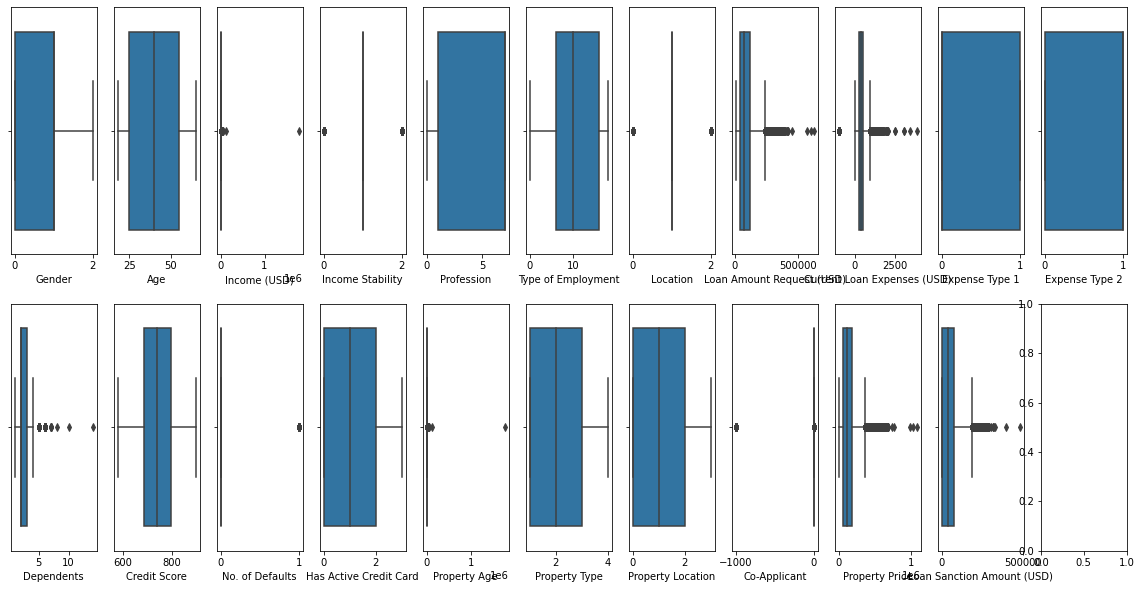

In [302]:

fig,ax = plt.subplots(ncols=11,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
  sns.boxplot(value,ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5,w_pad=10.0,h_pad=5.0)

# Checking the NormalDistribution

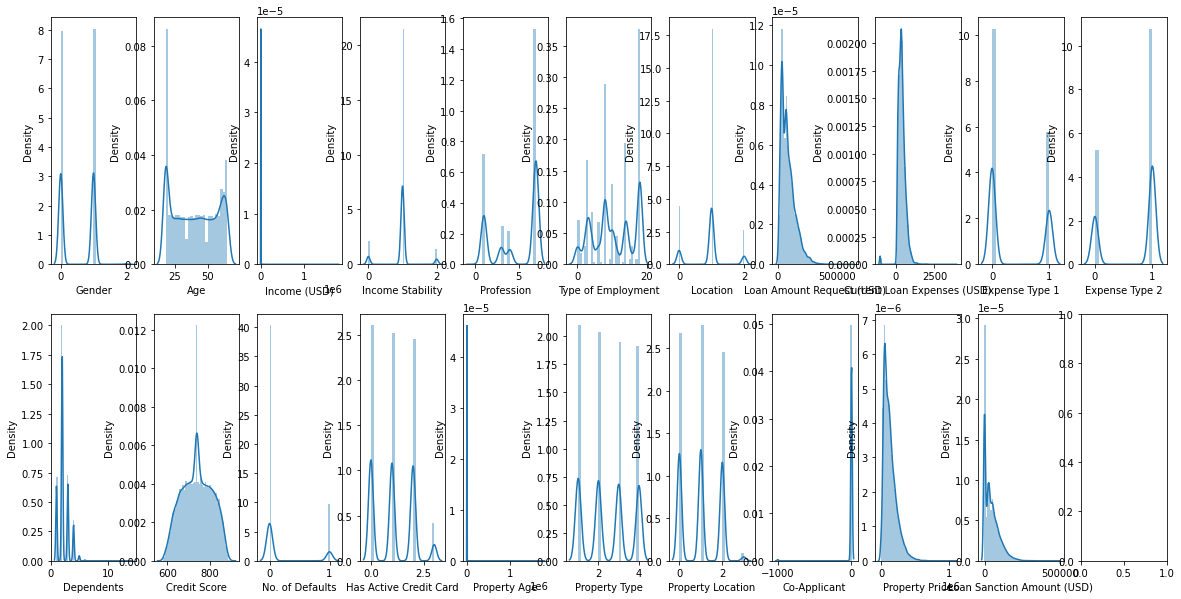

In [303]:
fig,ax = plt.subplots(ncols=11,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in df.items():
  sns.distplot(value,ax=ax[index])
  index +=1
plt.tight_layout(pad=0.5,w_pad=10.0,h_pad=5.0)

# Using Smogn to Undersample

In [305]:
cleaned = smogn.smoter(data=df,y="Loan Sanction Amount (USD)")

r_index: 100%|##########| 1455/1455 [00:03<00:00, 391.26it/s]


In [2]:
cleaned = pd.read_csv("/home/sreebalaji/Downloads/data.csv")
cleaned = cleaned.drop(['Unnamed: 0'],axis=1)

In [3]:
cleaned

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,0,39,1995.780213,1,6,2,0,137215.509210,535.546731,0,...,1.229363,770.612178,0,0,1995.780213,2,1,1,206706.258792,109896.909804
1,0,38,2215.728598,1,4,5,1,137867.330913,489.343295,0,...,1.350413,773.857101,0,0,2215.728598,1,1,1,208023.589917,110554.441549
2,0,38,1895.260967,1,5,1,0,137428.771816,531.756480,0,...,1.598784,775.093246,0,0,1895.260967,2,1,1,206464.210961,109896.909804
3,0,21,3315.697395,1,6,9,1,158379.762544,676.456083,0,...,1.961777,742.855857,0,1,3315.697395,4,0,1,248846.969491,110286.677675
4,0,18,3114.429828,1,4,3,0,156805.547489,478.627249,0,...,1.077784,847.989166,0,1,3114.429828,4,0,1,249743.833612,110286.677675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26608,0,64,4211.810000,1,1,2,2,225434.350000,867.880000,0,...,3.000000,842.810000,0,2,4211.810000,1,2,1,285966.630000,0.000000
26609,1,38,4969.410000,1,1,10,2,76657.900000,722.340000,1,...,2.000000,869.610000,0,2,4969.410000,4,2,1,111096.560000,68992.110000
26610,1,20,1606.880000,1,7,8,1,66595.140000,253.040000,0,...,3.000000,729.410000,0,1,1606.880000,3,2,1,73453.940000,46616.600000
26611,0,49,2222.435000,1,7,14,2,81410.080000,583.110000,0,...,2.000000,739.820000,0,0,2223.250000,1,0,1,102108.020000,61057.560000


In [4]:
cleaned.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

# Splitting the Dataset

In [5]:
x = cleaned[["Gender","Age","Income (USD)","Income Stability","Profession","Type of Employment","Location","Loan Amount Request (USD)","Current Loan Expenses (USD)","Expense Type 1","Expense Type 2","Dependents","Credit Score","No. of Defaults","Has Active Credit Card","Property Age","Property Type","Property Location","Co-Applicant","Property Price"]]

In [6]:
y = cleaned['Loan Sanction Amount (USD)']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.25,random_state =21)

# Random Forest

In [11]:
model = RandomForestRegressor(n_jobs=5)

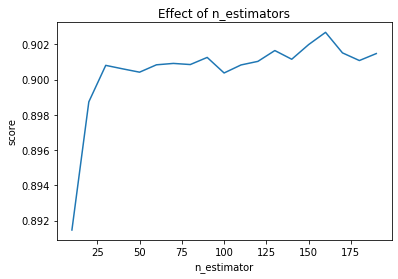

In [12]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [13]:
#random forest model accuracy
model.score(X_test,Y_test)*100

90.14775049689253

# ExtraTreesRegressor

In [26]:
reg = ExtraTreesRegressor(n_estimators=200, random_state=11)

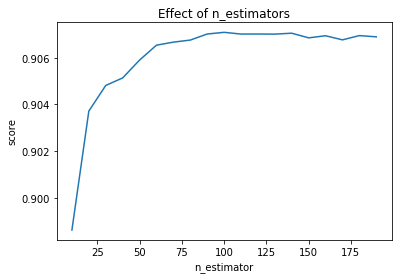

In [27]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    reg.set_params(n_estimators=n)
    reg.fit(X_train, Y_train)
    scores.append(reg.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [28]:
reg.score(X_test,Y_test)

0.9068960181451106

# Difference between the Actual and Predicted value

In [103]:
predictions = reg.predict(X_test)

result = X_test
result['Loan Sanction Amount (USD)'] = Y_test
result['prediction'] = predictions.tolist()
result.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),prediction
6075,1,59,3428.476861,0,3,15,1,180408.419222,626.893453,0,...,859.420149,0,1,3428.476861,3,1,1,242472.925939,144329.674871,138201.189398
7643,1,45,4387.403792,1,7,12,1,202934.782650,832.772859,0,...,781.564009,0,0,4387.403792,2,1,1,343226.199660,162353.037689,160676.265205
5041,0,60,4056.182904,1,1,3,1,205909.403787,867.714284,0,...,686.365807,0,0,4056.235447,1,1,1,309417.284130,135095.323161,127811.425174
15594,0,18,4929.440000,1,7,10,1,87942.370000,468.400000,0,...,833.630000,0,1,4929.440000,2,0,1,100471.890000,70353.900000,59447.819342
3735,0,46,9093.217780,1,3,9,1,181194.512175,603.462605,0,...,758.881359,0,1,9093.217780,3,1,1,243934.501128,126717.014110,132017.640950


# Saving the model

In [327]:
import pickle
saved_model = pickle.dumps(reg)
reg_from_pickle = pickle.loads(saved_model)
#reg_from_pickle.predict(X_test)

array([136701.09198823, 160699.90064486, 125684.20743503, ...,
       110588.02120404, 227081.31381334,  12626.10710526])

In [328]:
filename = 'finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))

# XG boost 

[12:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

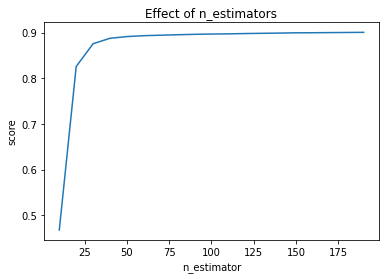

In [316]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    xgb_r.set_params(n_estimators=n)
    xgb_r.fit(X_train, Y_train)
    scores.append(xgb_r.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [317]:
xgb_r.score(X_test, Y_test)*100

90.07448704561817

# Linera_Regression

In [318]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
lm.score(X_test,Y_test)*100

85.56615441181283

# Testing the First 20 values from Test Sheet

In [132]:
data = pd.read_csv('/home/sreebalaji/Downloads/test - test.csv')

In [133]:
data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.50
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.30
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.10
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778.00
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [134]:
data.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

# Filling NaN values

In [135]:
data["Income Stability"].fillna("unknown", inplace = True)
data["Income Stability"].isnull().values.any()

False

In [136]:
data["Type of Employment"].fillna("unknown", inplace = True)
data["Type of Employment"].isnull().values.any()

False

In [137]:
z = data["Dependents"].median()
data["Dependents"].fillna(z, inplace = True)
data["Dependents"].isnull().values.any()

False

In [138]:
z = data["Credit Score"].median()
data["Credit Score"].fillna(z, inplace = True)
data["Credit Score"].isnull().values.any()

False

In [139]:
data["Has Active Credit Card"].fillna("unknown", inplace = True)
data["Has Active Credit Card"].isnull().values.any()

False

# Label Encoding


In [140]:
# Encode labels in column 
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([0, 1, 2])

In [141]:
data['Income Stability']= label_encoder.fit_transform(data['Income Stability'])
data['Income Stability'].unique()

array([1, 0, 2])

In [142]:
data['Profession']= label_encoder.fit_transform(data['Profession'])
data['Profession'].unique()

array([0, 6, 2, 3, 5, 1, 4])

In [143]:
data['Type of Employment']= label_encoder.fit_transform(data['Type of Employment'])
data['Type of Employment'].unique()

array([10, 14, 18,  8,  3, 11,  0,  6, 15,  4,  2, 16,  1,  9, 17, 13, 12,
        7,  5])

In [144]:
data['Location']= label_encoder.fit_transform(data['Location'])
data['Location'].unique()

array([1, 0, 2])

In [145]:
data['Has Active Credit Card']= label_encoder.fit_transform(data['Has Active Credit Card'])
data['Has Active Credit Card'].unique()

array([2, 1, 3, 0])

In [146]:
data['Property Location']= label_encoder.fit_transform(data['Property Location'])
data['Property Location'].unique()

array([2, 0, 1, 3])

In [147]:
data['Expense Type 1']= label_encoder.fit_transform(data['Expense Type 1'])
data['Expense Type 1'].unique()

array([0, 1])

In [148]:
data['Expense Type 2']= label_encoder.fit_transform(data['Expense Type 2'])
data['Expense Type 2'].unique()

array([0, 1])

In [154]:
x_test  = data[["Gender","Age","Income (USD)","Income Stability","Profession","Type of Employment","Location","Loan Amount Request (USD)","Current Loan Expenses (USD)","Expense Type 1","Expense Type 2","Dependents","Credit Score","No. of Defaults","Has Active Credit Card","Property Age","Property Type","Property Location","Co-Applicant","Property Price"]]

In [153]:
data.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [150]:
z = data["Income (USD)"].median()
data["Income (USD)"].fillna(z, inplace = True)
data["Income (USD)"].isnull().values.any()

False

In [151]:
z = data["Current Loan Expenses (USD)"].median()
data["Current Loan Expenses (USD)"].fillna(z, inplace = True)
data["Current Loan Expenses (USD)"].isnull().values.any()

False

In [152]:
z = data["Property Age"].median()
data["Property Age"].fillna(z, inplace = True)
data["Property Age"].isnull().values.any()

False

In [155]:
x_test.shape

(20000, 20)

In [156]:
y_pred = reg.predict(x_test)
y_pred
x = np.round(y_pred, decimals=2)
x

array([98225.53, 64766.14, 15198.9 , ...,  3030.89, 68441.44, 55415.4 ])

In [157]:
dict = {"Loan Sanction Amount (USD)":x}

In [158]:
val = data["Customer ID"]

In [159]:
dict={"Customer ID":val,"Loan Sanction Amount (USD)":x}

In [160]:
ans = pd.DataFrame(dict)

# Sample Submission csv

In [161]:
ans.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,98225.53
1,C-35067,64766.14
2,C-34590,15198.90
3,C-16668,64350.37
4,C-12196,64710.77


In [162]:
ans.to_csv("sample_submission.csv")